# Ethereum gas fees - quick analysis

#### Maria Silva, February 2024

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Data load 

In [2]:
base_df = pd.read_csv("../data/eth-base-fees-1-month.csv")
base_df["base_fee_perc"] = base_df["base_fee_gwei"].pct_change()
base_df["timestamp"] = pd.to_datetime(base_df['timestamp'])
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223862 entries, 0 to 223861
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   timestamp           223862 non-null  datetime64[ns, UTC]
 1   block_hash          223862 non-null  object             
 2   tx_count            223862 non-null  int64              
 3   max_miner_tip_gwei  223862 non-null  float64            
 4   min_miner_tip_gwei  223862 non-null  float64            
 5   avg_miner_tip_gwei  223862 non-null  float64            
 6   base_fee_gwei       223862 non-null  float64            
 7   base_fee_perc       223861 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 13.7+ MB


In [3]:
prio_df = pd.read_csv("../data/eth-priority-fees-15-days.csv")
sample_prio_df = prio_df.sample(frac=0.05).sort_values("timestamp")
sample_prio_df["timestamp"] = pd.to_datetime(prio_df['timestamp'])
sample_prio_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694953 entries, 1237212 to 12305710
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   timestamp              694953 non-null  datetime64[ns, UTC]
 1   max_priority_fee_gwei  694953 non-null  float64            
 2   max_gas_fee_gwei       694953 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 21.2 MB


## ETH Base fees

In [4]:
temp_df = (
    base_df
    [["base_fee_gwei"]]
    .agg(["mean", "std"])
    .round(5)
).T
temp_df["coef_var"] = (temp_df["std"]/temp_df["mean"]).round(2)
temp_df

,mean,std,coef_var
base_fee_gwei,26.913,18.27786,0.68


In [5]:
(base_df
 [["base_fee_gwei"]]
 .quantile([0, 0.25, 0.5, 0.75, 1])
 .round(5)
).T

,0.00,0.25,0.50,0.75,1.00
base_fee_gwei,6.30259,15.38928,22.33569,32.41153,477.51453


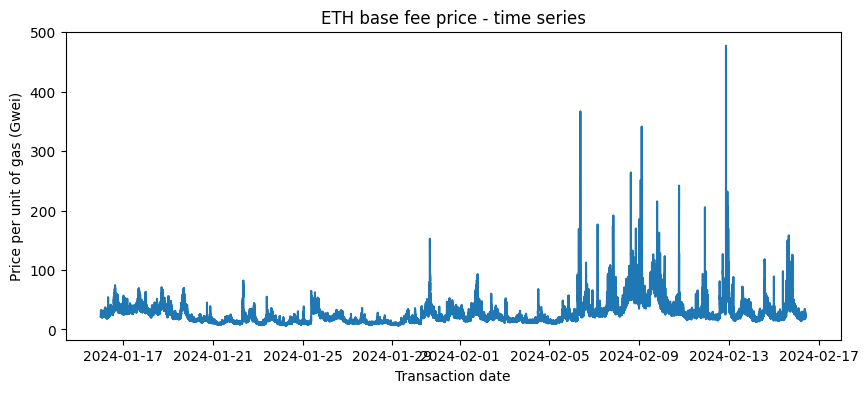

In [6]:
plt.figure(figsize=(10,4))
sns.lineplot(data=base_df, x='timestamp', y='base_fee_gwei')
plt.title("ETH base fee price - time series")
plt.xlabel('Transaction date')
plt.ylabel('Price per unit of gas (Gwei)')
plt.show()

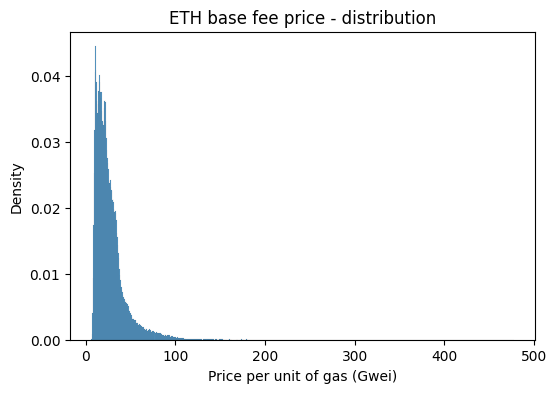

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(data=base_df, x='base_fee_gwei', stat='density')
plt.title("ETH base fee price - distribution")
plt.xlabel('Price per unit of gas (Gwei)')
plt.ylabel('Density')
plt.show()

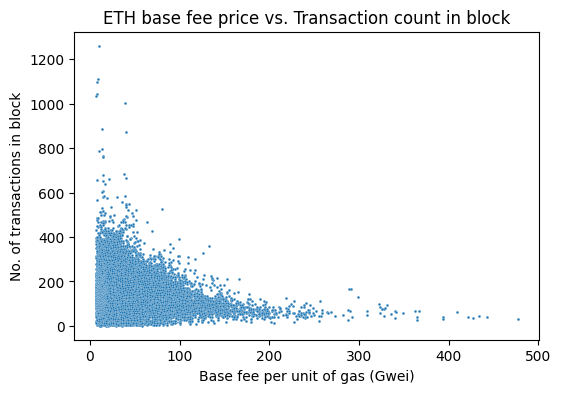

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=base_df, x='base_fee_gwei', y='tx_count', s=4)
plt.title("ETH base fee price vs. Transaction count in block")
plt.xlabel('Base fee per unit of gas (Gwei)')
plt.ylabel('No. of transactions in block')
plt.show()

## ETH Base fee - percent change

In [9]:
temp_df = (
    base_df
    [["base_fee_perc"]]
    .agg(["mean", "std"])
    .round(5)
).T
temp_df["coef_var"] = (temp_df["std"]/temp_df["mean"]).round(2)
temp_df

,mean,std,coef_var
base_fee_perc,0.00106,0.04667,44.03


In [10]:
(base_df
 [["base_fee_perc"]]
 .quantile([0, 0.25, 0.5, 0.75, 1])
 .round(5)
).T

,0.00,0.25,0.50,0.75,1.00
base_fee_perc,-0.24389,-0.03011,-0.00799,0.02266,0.125


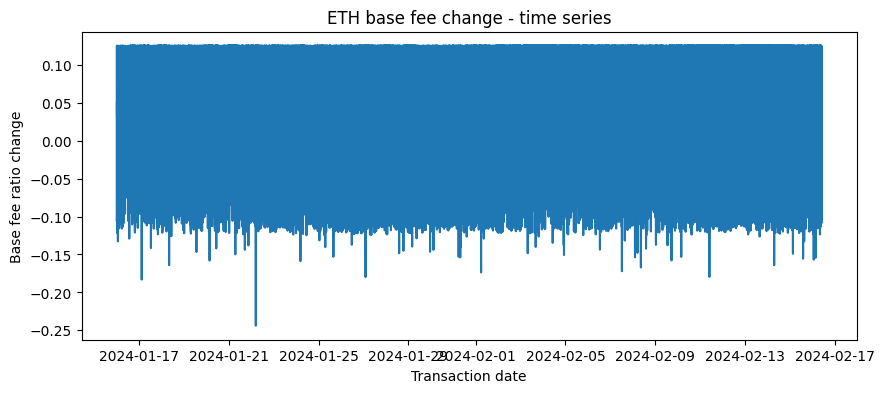

In [11]:
plt.figure(figsize=(10,4))
sns.lineplot(data=base_df, x='timestamp', y='base_fee_perc')
plt.title("ETH base fee change - time series")
plt.xlabel('Transaction date')
plt.ylabel('Base fee ratio change')
plt.show()

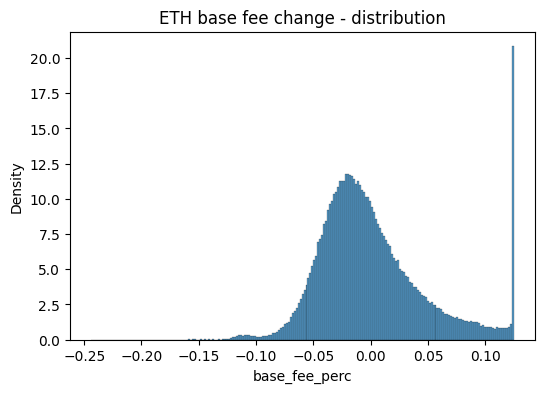

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(data=base_df, x='base_fee_perc', stat='density')
plt.title("ETH base fee change - distribution")
plt.ylabel('Base fee ratio change')
plt.ylabel('Density')
plt.show()

## ETH priority fees

In [13]:
temp_df = (
    sample_prio_df
    [["max_priority_fee_gwei"]]
    .agg(["mean", "std"])
    .round(5)
).T
temp_df["coef_var"] = (temp_df["std"]/temp_df["mean"]).round(2)
temp_df

,mean,std,coef_var
max_priority_fee_gwei,4.64177,60.10701,12.95


In [14]:
(sample_prio_df
 [["max_priority_fee_gwei"]]
 .quantile([0, 0.25, 0.5, 0.75, 1])
 .round(5)
).T

,0.00,0.25,0.50,0.75,1.00
max_priority_fee_gwei,0.0,0.01309,0.1,2.0,26760.4215


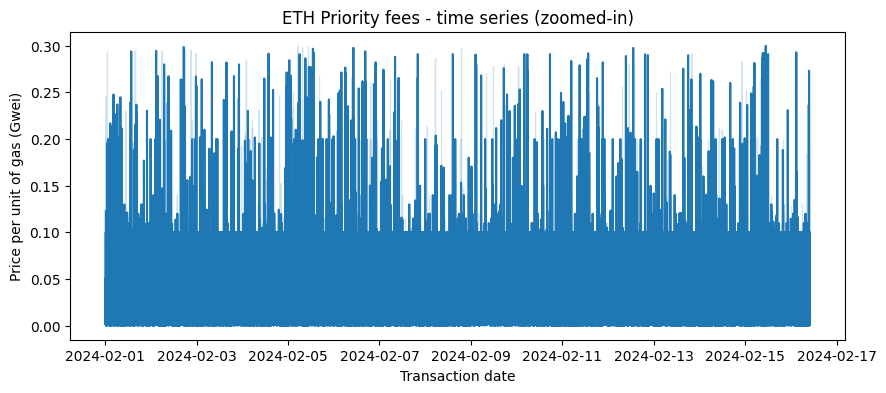

In [15]:
temp = sample_prio_df[sample_prio_df["max_priority_fee_gwei"]<0.3].sample(frac=0.1)
plt.figure(figsize=(10,4))
sns.lineplot(data=temp, x='timestamp', y='max_priority_fee_gwei')
plt.title("ETH Priority fees - time series (zoomed-in)")
plt.xlabel('Transaction date')
plt.ylabel('Price per unit of gas (Gwei)')
plt.show()

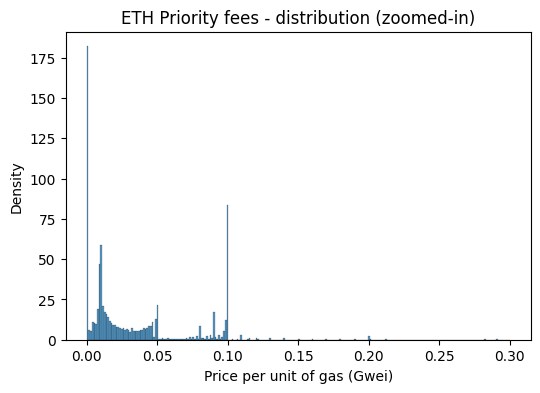

In [16]:
temp = sample_prio_df[sample_prio_df["max_priority_fee_gwei"]<0.3]
plt.figure(figsize=(6,4))
sns.histplot(data=temp, x='max_priority_fee_gwei', stat='density')
plt.title("ETH Priority fees - distribution (zoomed-in)")
plt.xlabel('Price per unit of gas (Gwei)')
plt.ylabel('Density')
plt.show()

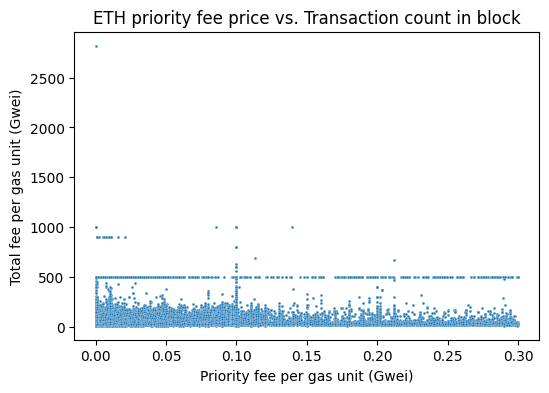

In [17]:
temp = sample_prio_df[sample_prio_df["max_priority_fee_gwei"]<0.3]
plt.figure(figsize=(6,4))
sns.scatterplot(data=temp, x='max_priority_fee_gwei', y='max_gas_fee_gwei', s=4)
plt.title("ETH priority fee price vs. Transaction count in block")
plt.xlabel('Priority fee per gas unit (Gwei)')
plt.ylabel('Total fee per gas unit (Gwei)')
plt.show()